In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
oh5 = pd.read_csv('OH_may19.csv')

In [85]:
# feature and target names as variables

feature_names = ['Temperature(F)', 'Wind_Direction']
target_name = ['Visibility(mi)']

In [86]:
#create new DataFrame for project

df1 = pd.concat([oh5[target_name], oh5[feature_names]], axis=1)

In [ ]:
# check null vales for each feature & target

In [90]:
df1['Visibility(mi)'].isnull().value_counts()

False    45884
True       216
Name: Visibility(mi), dtype: int64

In [89]:
df1['Wind_Direction'].isnull().value_counts()

False    45933
True       167
Name: Wind_Direction, dtype: int64

In [91]:
# Add extra column with null values for Wind_Direction
feature_names.append('Wind_Direction_null')
df1[feature_names[-1]] = df1['Wind_Direction'].isnull()


In [93]:
df1.head()

,Visibility(mi),Temperature(F),Wind_Direction,Wind_Direction_null
0,10.0,36.9,Calm,False
1,10.0,37.9,Calm,False
2,10.0,36.0,SW,False
3,9.0,35.1,SW,False
4,6.0,36.0,SW,False


In [95]:
# ffill missing/null values in df1:

df2 = df1.copy()
#oh5_1.fillna(oh5_1.mean(), inplace=True)....I tried this one
# but didn't work
df2.fillna(method='ffill', inplace=True)

In [96]:
# check all missing values are filled

df2['Visibility(mi)'].isnull().value_counts()

False    46100
Name: Visibility(mi), dtype: int64

In [66]:
#oh5V = oh5[target_name]
#oh5T = oh5V.copy()
#oh5T.fillna(method='ffill', inplace=True)

In [97]:
df2.head()

,Visibility(mi),Temperature(F),Wind_Direction,Wind_Direction_null
0,10.0,36.9,Calm,False
1,10.0,37.9,Calm,False
2,10.0,36.0,SW,False
3,9.0,35.1,SW,False
4,6.0,36.0,SW,False


<Figure size 842.4x595.44 with 0 Axes>

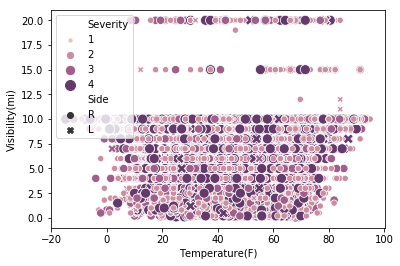

<Figure size 842.4x595.44 with 0 Axes>

In [116]:
%matplotlib inline
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
y = oh5['Temperature(F)']
x = oh5['Visibility(mi)']
sns.scatterplot(x ='Temperature(F)',y='Visibility(mi)', data=oh5, 
                size='Severity', style='Side',sizes=(10,100), hue='Severity', palette=cmap)
plt.figure(figsize=(11.7, 8.27))

# By eye-balling, there doesn't seem to be a linear fit for Temperature vrs Visibility??

In [99]:
df3 = df2[feature_names]

In [101]:
df3.head()

,Temperature(F),Wind_Direction,Wind_Direction_null
0,36.9,Calm,False
1,37.9,Calm,False
2,36.0,SW,False
3,35.1,SW,False
4,36.0,SW,False


In [102]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46100 entries, 0 to 46099
Data columns (total 3 columns):
Temperature(F)         46100 non-null float64
Wind_Direction         46100 non-null object
Wind_Direction_null    46100 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 765.5+ KB


In [103]:
wd_dummies = pd.get_dummies(df3['Wind_Direction']) #Wind_Direction 0s and 1s

In [104]:
wd_dummies.head(3)

,Calm,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW,West
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [105]:
#concat dummy variables to feature_names
df4 = pd.concat([df3,wd_dummies.drop('West', axis='columns')],axis = 'columns')

In [109]:
df4.head()

,Temperature(F),Wind_Direction,Wind_Direction_null,Calm,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW
0,36.9,Calm,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37.9,Calm,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36.0,SW,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,35.1,SW,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,36.0,SW,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [106]:
#drop "Wind_Direction" column
df5= df4.drop(['Wind_Direction'], axis='columns')# remove Wind_Direction column

In [108]:
df5.head()

,Temperature(F),Wind_Direction_null,Calm,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW
0,36.9,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37.9,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36.0,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,35.1,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,36.0,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [110]:
#form X with indepdendent variables
X = df5
X.head(3)

,Temperature(F),Wind_Direction_null,Calm,ENE,ESE,East,NE,NNE,NNW,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW
0,36.9,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,37.9,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,36.0,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [111]:
X['Temperature(F)'].isnull().value_counts()

False    46100
Name: Temperature(F), dtype: int64

In [112]:
y = df2[target_name] # Visibility assigned to dependent variable y
y.head()

,Visibility(mi)
0,10.0
1,10.0
2,10.0
3,9.0
4,6.0


In [113]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [114]:
from sklearn.linear_model import LinearRegression
lr_cl = LinearRegression()
lr_cl.fit(X_train,y_train)
lr_cl.score(X_test, y_test)

0.05365316018040889

# Linear Regression:

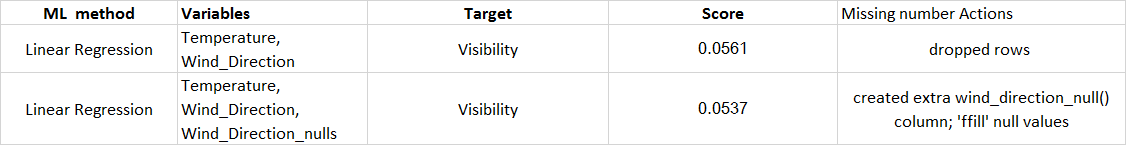